In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# LAB 1

## Creation of the graph (without occupancy)

In [110]:
nodes = pd.read_csv('Documentation/nodes.csv', header=None, index_col=0, names=["Node","x_position","y_position"])
edges = pd.read_csv('Documentation/links.csv', header=None, names=[
    "Link ID", 
    "Length (m)",
    "Number of lanes", 
    "Starting node ID",
    "Ending node ID", 
    "Region"], index_col=0)
print(nodes.head(5),"\n", edges.head(5))

      x_position  y_position
Node                        
1         429948     4581385
2         431582     4580937
3         432524     4583069
4         432650     4582536
5         432645     4582410 
          Length (m)  Number of lanes  Starting node ID  Ending node ID  Region
Link ID                                                                       
512      109.223913                3             21109           19069       4
513      129.668254                3             19067           21109       4
514      133.572478                2             19065           21042       4
516       47.649608                2                11           19201       3
593       96.553539                3             18703              84       4


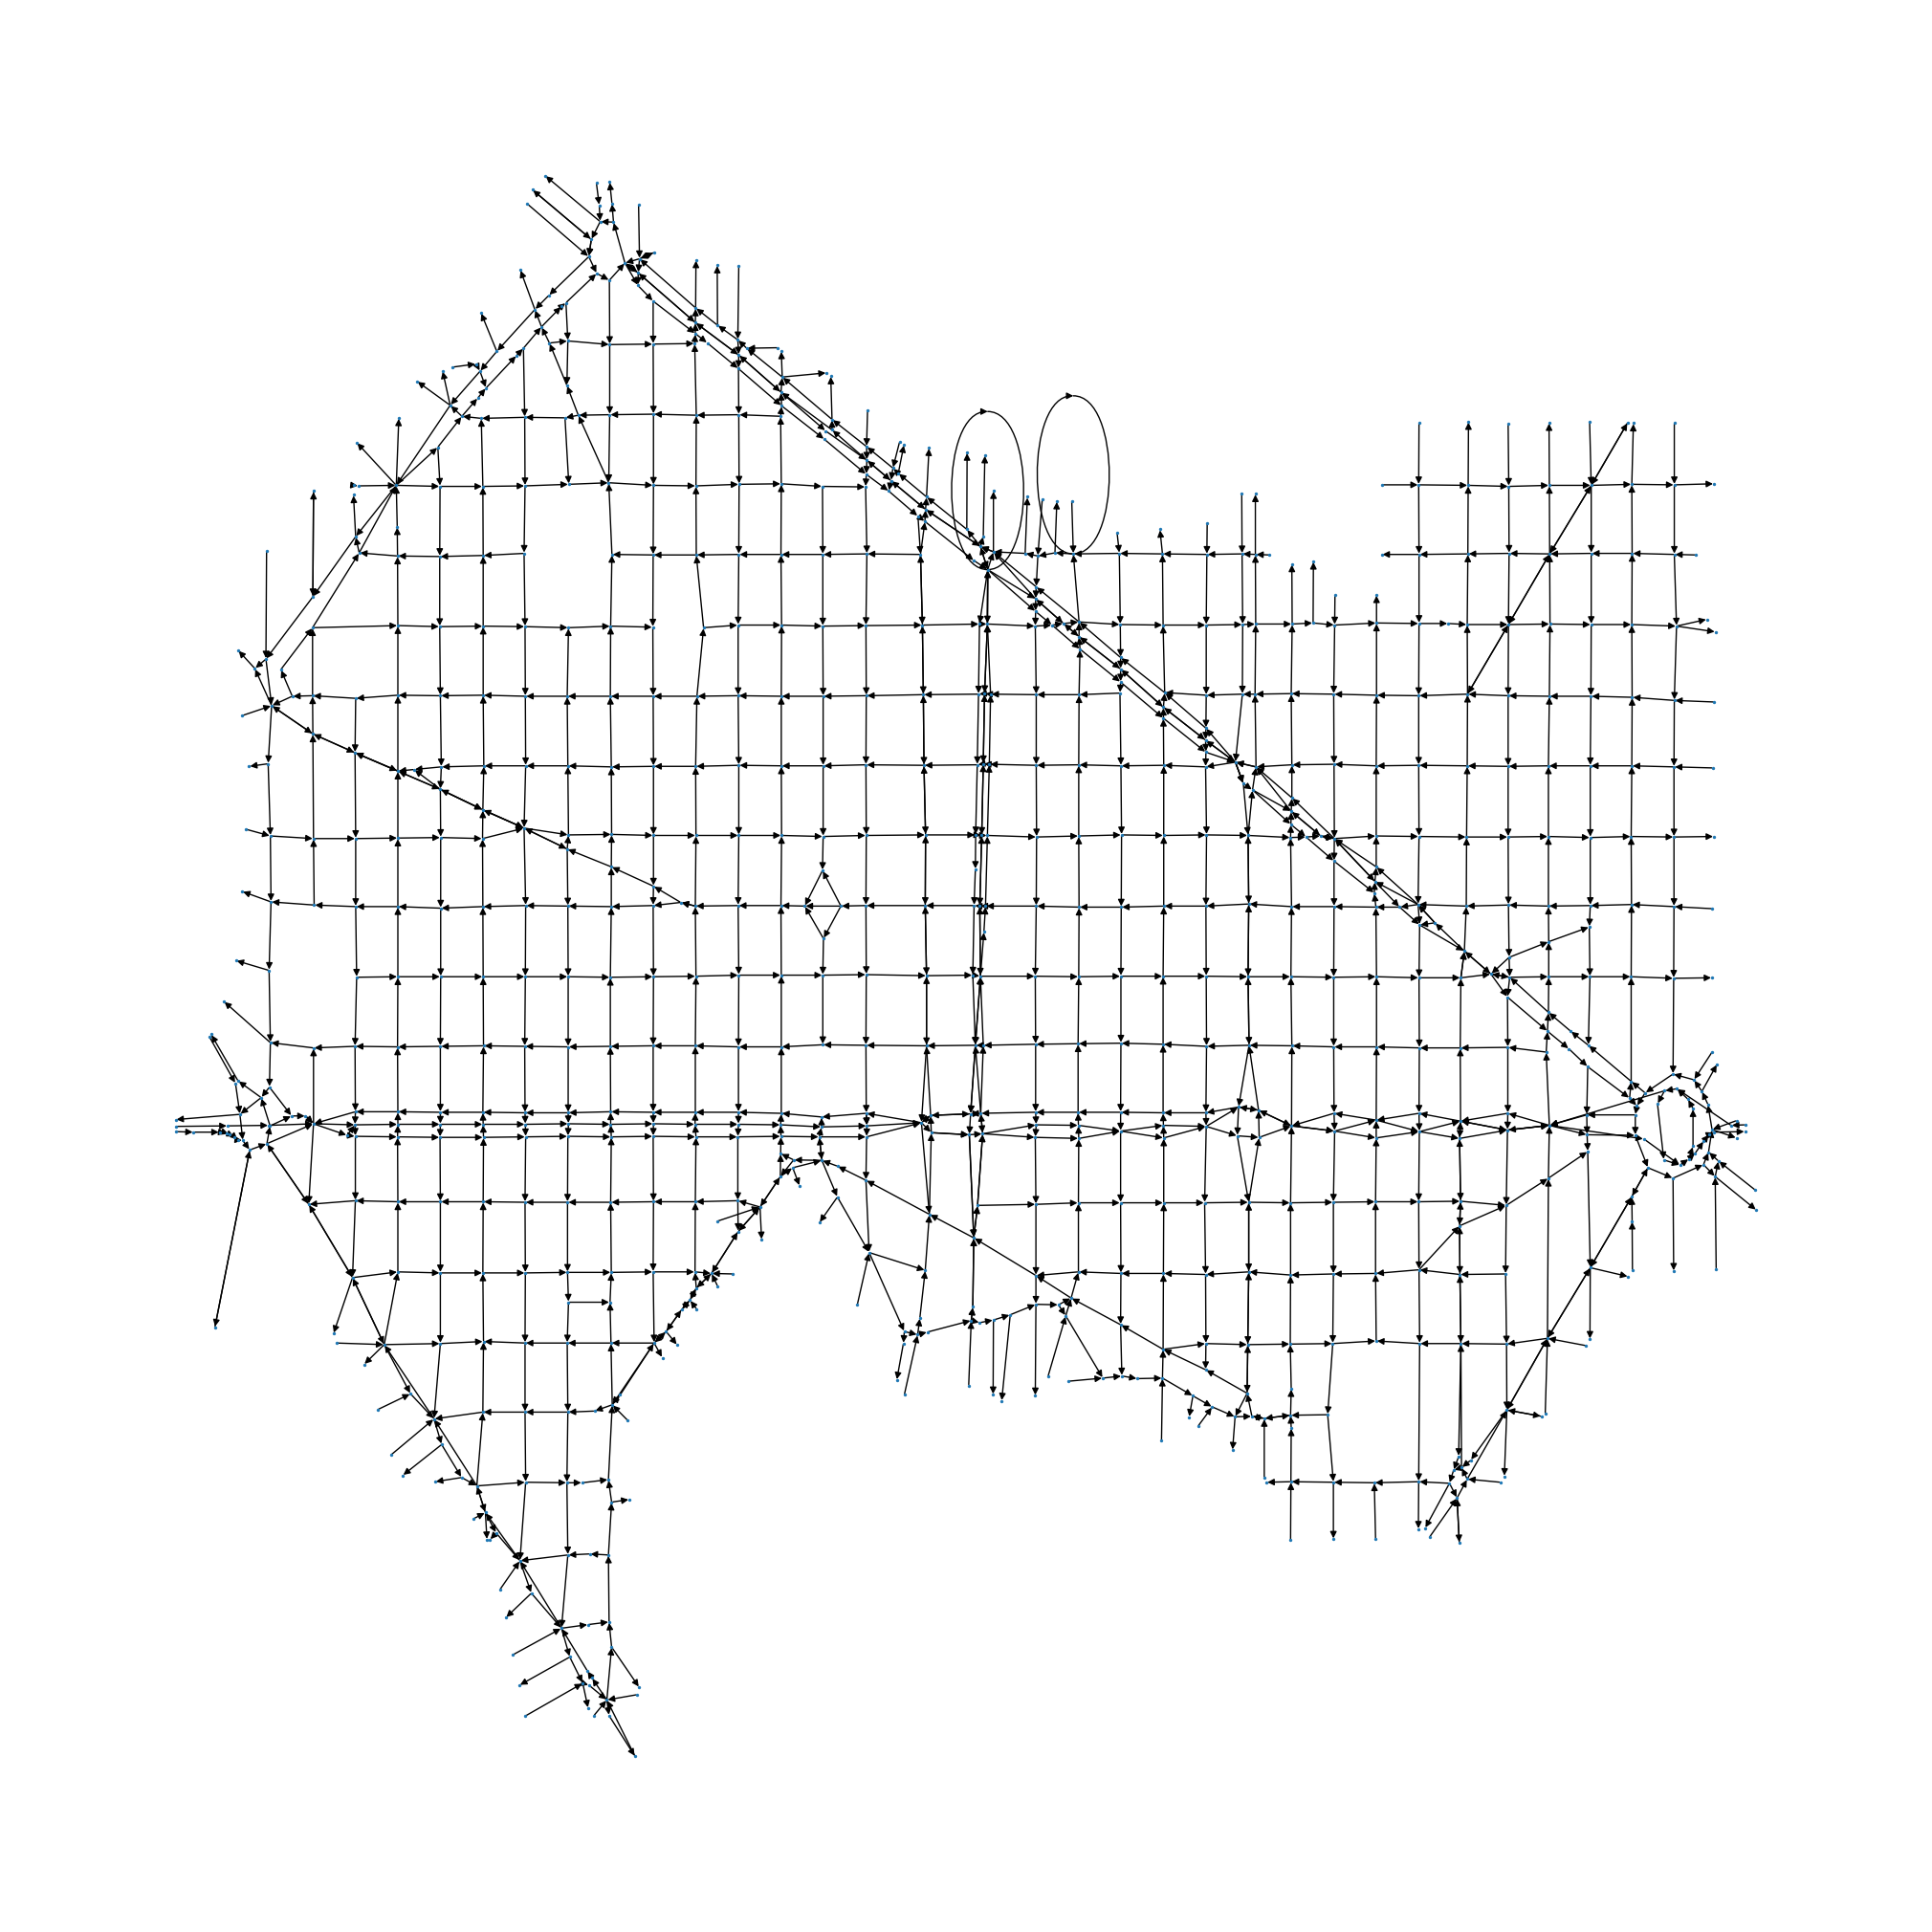

In [115]:
G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region"],
                            create_using=nx.MultiDiGraph)
plt.figure(figsize=(20,20))
nx.draw(G, node_size = 2, pos=nodes.transpose())
plt.show()

## Adding occupancy

In [116]:
occupancy = pd.read_csv('Documentation/occupancy.csv', index_col = 0)

time_in_minutes = 60
time = time_in_minutes * 60
occupancy_at_t = occupancy.loc[time]
occupancy_at_t.name = f"Occupancy at time {time}"
edges_at_t = edges
edges_at_t["Occupancy"] = occupancy_at_t.values

In [117]:
len(G.edges), len(occupancy_at_t), len(edges)

(1570, 1570, 1570)

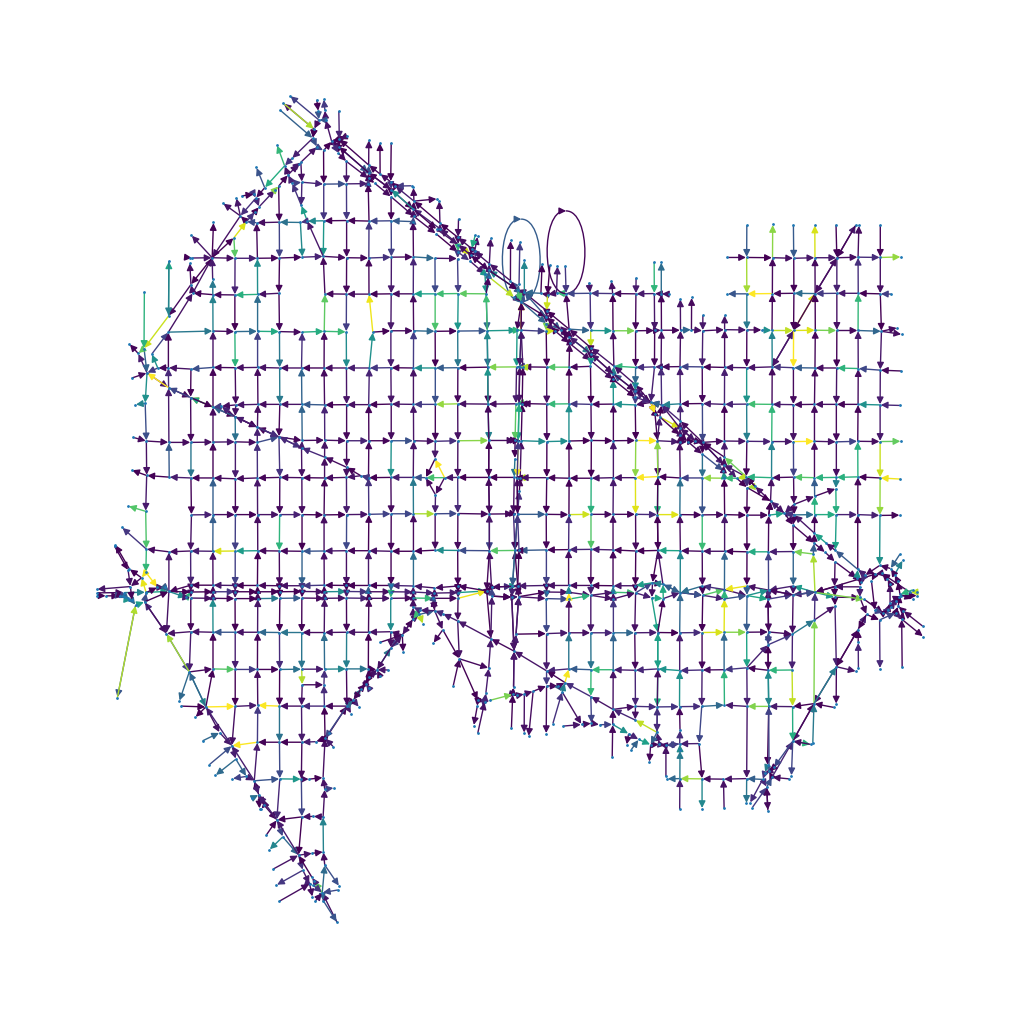

In [120]:
plt.figure(figsize=(10,10))
nx.draw(G, node_size = 1, pos=nodes.transpose(),  edge_color=occupancy_at_t)
plt.show()

## Brol

In [24]:
H = nx.Graph()

In [39]:
a = np.array(G.nodes)
a.sort()

In [41]:
nodes.transpose().to_dict()

{1: {'x_position': 429948, 'y_position': 4581385},
 2: {'x_position': 431582, 'y_position': 4580937},
 3: {'x_position': 432524, 'y_position': 4583069},
 4: {'x_position': 432650, 'y_position': 4582536},
 5: {'x_position': 432645, 'y_position': 4582410},
 6: {'x_position': 428085, 'y_position': 4582825},
 7: {'x_position': 429247, 'y_position': 4580521},
 8: {'x_position': 431601, 'y_position': 4582951},
 9: {'x_position': 431314, 'y_position': 4580934},
 10: {'x_position': 430096, 'y_position': 4581212},
 11: {'x_position': 432591, 'y_position': 4582817},
 12: {'x_position': 430549, 'y_position': 4581247},
 13: {'x_position': 430613, 'y_position': 4581238},
 14: {'x_position': 429117, 'y_position': 4580599},
 15: {'x_position': 432747, 'y_position': 4581728},
 16: {'x_position': 428923, 'y_position': 4583515},
 17: {'x_position': 431231, 'y_position': 4581054},
 18: {'x_position': 429253, 'y_position': 4580639},
 19: {'x_position': 431752, 'y_position': 4580940},
 20: {'x_position': 4

In [60]:
len(G.edges)

1546

In [57]:
len(edges)

1570